# Load libraries

In [0]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, ensemble
from sklearn.model_selection import train_test_split

# Load data

In [0]:
def load_data_regression():
  diabetes = datasets.load_diabetes()
  return train_test_split(diabetes.data, diabetes.target, test_size=.25, random_state=0)

In [0]:
def load_data_classification():
  digits = datasets.load_digits()
  return train_test_split(digits.data,digits.target,test_size=.25,random_state=0)

In [0]:
# random forest has two models
# 1. RandomForestClassifier
# 2. RandomForestRegressor

In [0]:
# class sklearn.ensemble.RandomForestRegressor()

## Params
# n_estimators: an integer for the amount of base decision trees, the default amount is 100, it is better to have more base trees because GBDT is robost to overfitting
# criterion: a string for every tree's criterion
# max_features: a integer or float or string or None
# max_depth: integer or None. for the depth of every tree. Tune this param could obtain optimal performance, but if the max_leaf_nodes is not None, ignore this param
# min_samples_split: integer, the param for each tree
# min_samples_leaf: integer, the param for each tree
# min_weight_fraction_leaf: float, the param for each tree
# max_leaf_nodes: oculd be integer or None
# bootstrap: bool, if True then using bootstrap sampling to produce 
# oob_score: bool, if True then use samples outside to compute error
# n_jobs: integer for parallization. -1 means using all available CPU
# verbose: integer for log info, 0 input, 1 input periodically
# warm_start: bool, True then use the result from previous run, otherwise cold start
# random_state


## Attributes:
# estimators_
# n_features_
# n_output_
# feature_importances_: array of importance
# obb_score_
# oob_prediction_

## Methods
# fit(X,y)
# predict(X)
# score(X,y)

# test random forest regressor

In [0]:
def test_RFR(*data):
  X_train, X_test, y_train, y_test = data
  regr = ensemble.RandomForestRegressor()
  regr.fit(X_train, y_train)
  print("Training score:%f"%regr.score(X_train,y_train))
  print('Testing score:%f'%regr.score(X_test,y_test))

X_train, X_test, y_train, y_test = load_data_regression()
test_RFR(X_train, X_test, y_train, y_test)
# it is bad

Training score:0.923179
Testing score:0.214267


# Consider the impact from amount of base decision trees

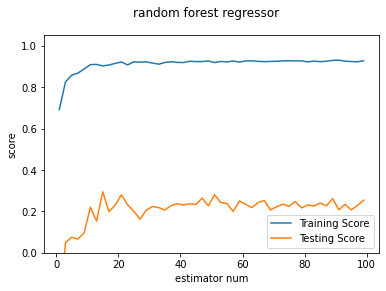

In [0]:
def test_RFR_base(*data):
  X_train, X_test, y_train, y_test = data
  nums = np.arange(1,100,step=2)
  fig = plt.figure()
  ax = fig.add_subplot(1,1,1)
  testing_scores=[]
  training_scores=[]
  for num in nums:
    regr=ensemble.RandomForestRegressor(n_estimators=num)
    regr.fit(X_train, y_train)
    training_scores.append(regr.score(X_train, y_train))
    testing_scores.append(regr.score(X_test, y_test))
  ax.plot(nums, training_scores, label='Training Score')
  ax.plot(nums, testing_scores, label='Testing Score')
  ax.set_xlabel('estimator num')
  ax.set_ylabel('score')
  ax.legend(loc='lower right')
  ax.set_ylim(0,1.05)
  plt.suptitle("random forest regressor")
  plt.show()

X_train, X_test, y_train, y_test = load_data_regression()
test_RFR_base(X_train, X_test, y_train, y_test)
# not stable, overfitting

# Consider the impact from max depth

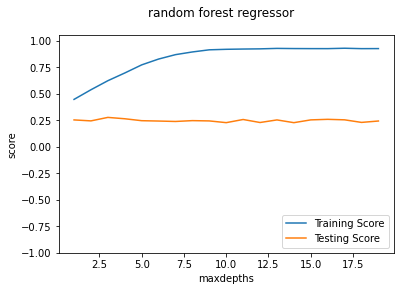

In [0]:
def test_RFR_depth(*data):
  X_train, X_test, y_train, y_test = data
  maxdepths = np.arange(1,20)
  fig = plt.figure()
  ax = fig.add_subplot(1,1,1)
  testing_scores=[]
  training_scores=[]
  for maxdepth in maxdepths:
    regr=ensemble.RandomForestRegressor(max_depth=maxdepth, )
    regr.fit(X_train, y_train)
    training_scores.append(regr.score(X_train, y_train))
    testing_scores.append(regr.score(X_test, y_test))
  ax.plot(maxdepths, training_scores, label='Training Score')
  ax.plot(maxdepths, testing_scores, label='Testing Score')
  ax.set_xlabel('maxdepths')
  ax.set_ylabel('score')
  ax.legend(loc='lower right')
  ax.set_ylim(-1,1.05)
  plt.suptitle("random forest regressor")
  plt.show()

X_train, X_test, y_train, y_test = load_data_regression()
test_RFR_depth(X_train, X_test, y_train, y_test)
# GBRT to testing set is going down with the increase of max depth

# Consider the impact from max_features

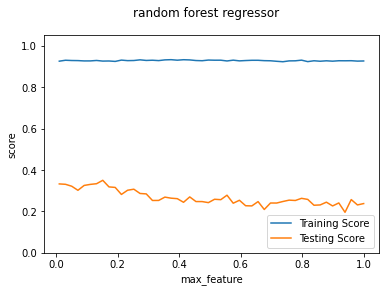

In [0]:
def test_RFR_max_features(*data):
  X_train, X_test, y_train, y_test = data
  fig = plt.figure()
  ax = fig.add_subplot(1,1,1)
  max_features = np.linspace(0.01,1)
  testing_scores=[]
  training_scores=[]
  for features in max_features:
    regr=ensemble.RandomForestRegressor(max_features=features)
    regr.fit(X_train, y_train)
    training_scores.append(regr.score(X_train, y_train))
    testing_scores.append(regr.score(X_test, y_test))
  ax.plot(max_features, training_scores, label='Training Score')
  ax.plot(max_features, testing_scores, label='Testing Score')
  ax.set_xlabel('max_feature')
  ax.set_ylabel('score')
  ax.legend(loc='lower right')
  ax.set_ylim(0,1.05)
  plt.suptitle("random forest regressor")
  plt.show()

X_train, X_test, y_train, y_test = load_data_regression()
test_RFR_max_features(X_train, X_test, y_train, y_test)
# it is not sensitive to feature selection

# Consider the loss

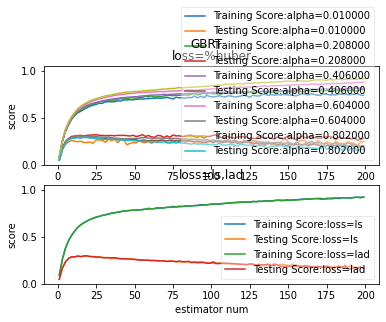

In [0]:
def test_GBRT_loss(*data):
  X_train, X_test, y_train, y_test = data
  fig = plt.figure()
  nums = np.arange(1,200, step=2)
  losses = ['ls','lad','huber']
  # plot huber
  ax = fig.add_subplot(2,1,1)
  alphas = np.linspace(.01,1, endpoint=False, num=5)

  for alpha in alphas:
    testing_scores = []
    training_scores=[]
    for num in nums:
      regr = ensemble.GradientBoostingRegressor(n_estimators=num, loss='huber',alpha=alpha)
      regr.fit(X_train, y_train)
      training_scores.append(regr.score(X_train, y_train))
      testing_scores.append(regr.score(X_test, y_test))
    ax.plot(nums,training_scores, label='Training Score:alpha=%f'%alpha)
    ax.plot(nums,testing_scores,label='Testing Score:alpha=%f'%alpha)
  ax.set_xlabel("estimator num")
  ax.set_ylabel('score')
  ax.legend(loc='lower right', framealpha=.4)
  ax.set_ylim(0,1.05)
  ax.set_title('loss=%huber')
  plt.suptitle('GBRT')
  # plt ls and lad
  ax = fig.add_subplot(2,1,2)
  for loss in ['ls','lad']:
    testing_scores = []
    training_scores=[]
    for num in nums:
      regr = ensemble.GradientBoostingRegressor(n_estimators=num, loss='huber',alpha=alpha)
      regr.fit(X_train, y_train)
      training_scores.append(regr.score(X_train, y_train))
      testing_scores.append(regr.score(X_test, y_test))
    ax.plot(nums,training_scores, label='Training Score:loss=%s'%loss)
    ax.plot(nums,testing_scores,label='Testing Score:loss=%s'%loss)
  ax.set_xlabel("estimator num")
  ax.set_ylabel('score')
  ax.legend(loc='lower right', framealpha=.4)
  ax.set_ylim(0,1.05)
  ax.set_title('loss=ls,lad')
  plt.suptitle('GBRT')
  plt.show()


X_train, X_test, y_train, y_test = load_data_regression()
test_GBRT_loss(X_train, X_test, y_train, y_test)